#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.

### You would need to submit your GitHub repository link. Refer to the PDF document for the instructions and details.





In [9]:
## import cv2
import cv2
## import numpy
import numpy as np
## import matplotlib pyplot
import matplotlib.pyplot as plt
## import KMeans cluster from sklearn
from sklearn.cluster import KMeans
## import distance from scipy.spatial
from scipy.spatial import distance 
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [45]:
## Reading the image plaksha_Faculty.jpg
img=cv2.imread("C:/Users/Malini/Downloads/Plaksha_Faculty.jpg")
## Convert the image to grayscale
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  
# Loading the required haar-cascade xml classifier file
face_cascade_name = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(face_cascade_name)
  
# Applying the face detection method on the grayscale image. 
## Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))
 
# Define the text and font parameters
text = "*" ## The text you want to write - symbolic detection (avoids cluttering)
font = cv2.FONT_HERSHEY_SIMPLEX  ## Font type
font_scale =2  ## Font scale factor
font_color = (0, 0, 255)  ## Text color in BGR format (here, it's red)
font_thickness = 5 ## Thickness of the text

  
# Iterating through rectangles of detected faces
face_count=0
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Use cv2.putText to add the text to the image, Use text, font, font_scale, font_color, font_thickness here
    cv2.putText(img,text,(x,y),font,font_scale,font_color,font_thickness)
    face_count+=1
    
## Display the image and window title should be "Total number of face detected are #"  
cv2.imshow(f"Total number of faces detected are {face_count}",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

C:\Users\Malini\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


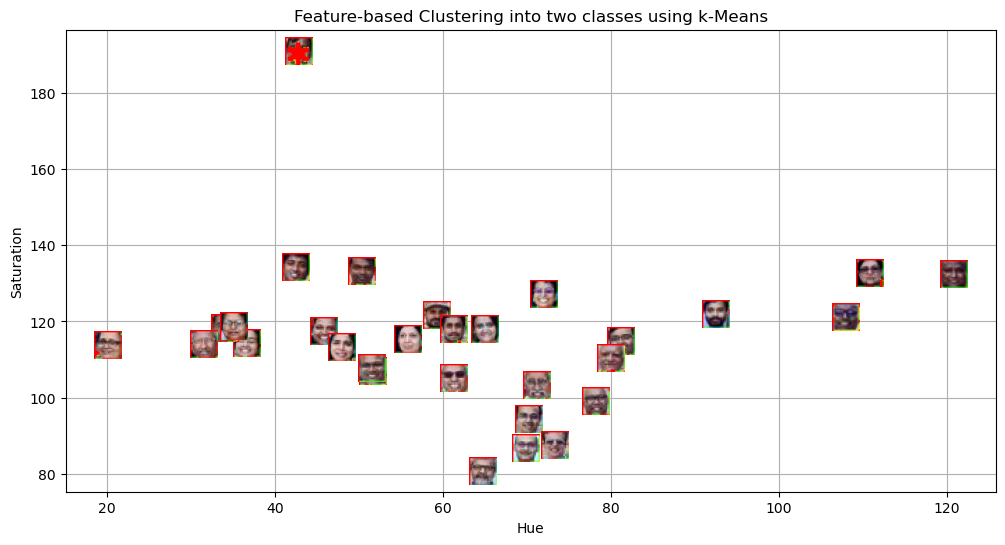

In [41]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV) ## call the img and convert it from BGR to HSV and store in img_hsv
hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(hue_saturation)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1],marker='o')
    

## Put x label
plt.xlabel('Hue')
## Put y label
plt.ylabel('Saturation')
## Put title
plt.title('Feature-based Clustering into two classes using k-Means')
## Put grid
plt.grid()
## show the plot
plt.show()




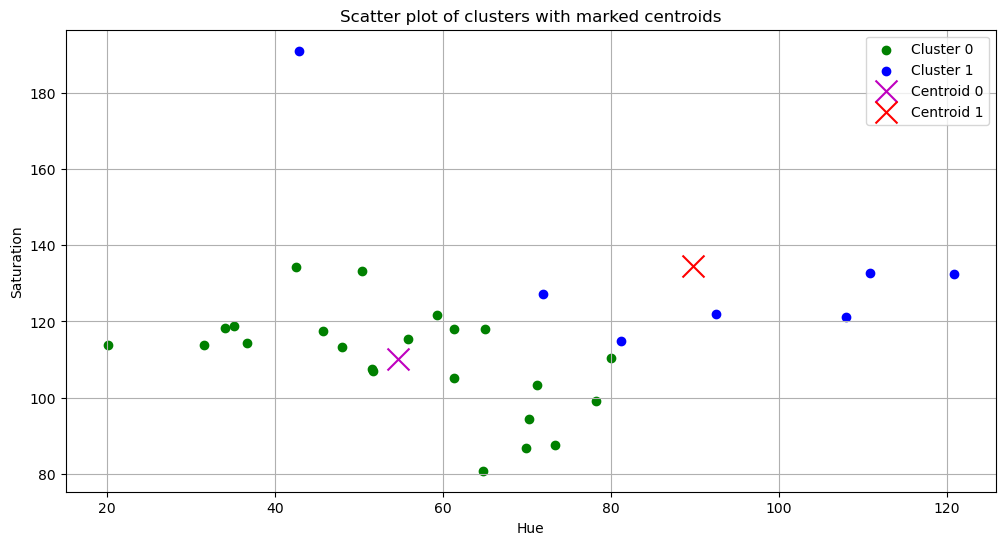

In [44]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:,0],cluster_0_points[:,1],c='g')
legend_labels.append('Cluster 0')


cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:,0],cluster_1_points[:,1],c='b')
legend_labels.append('Cluster 1')

# Calculate and plot centroids
centroid_0 = centroids[0]
centroid_1 = centroids[1]

# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0],centroid_0[1],marker='x',color='m',s=250)
legend_labels.append('Centroid 0')
plt.scatter(centroid_1[0],centroid_1[1],marker='x',color='r',s=250)
legend_labels.append('Centroid 1')

## Put x label
plt.xlabel('Hue')
## Put y label
plt.ylabel('Saturation')
## Put title
plt.title('Scatter plot of clusters with marked centroids')
## Add a legend
plt.legend(legend_labels)
## Add grid
plt.grid()
## Show the plot
plt.show()


In [46]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread("C:/Users/Malini/Downloads/Dr_Shashi_Tharoor.jpg")
# Detect face  in the template image after converting it to gray and store it in template_faces
gray_template = cv2.cvtColor(template_img,cv2.COLOR_BGR2GRAY)
template_faces = face_cascade.detectMultiScale(gray_template, scaleFactor=1.1, minNeighbors=5)
# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)
cv2.imshow('Dr. Shashi Tharoor Face Detection',template_img)
cv2.waitKey(0)
cv2.destroyAllWindows()      

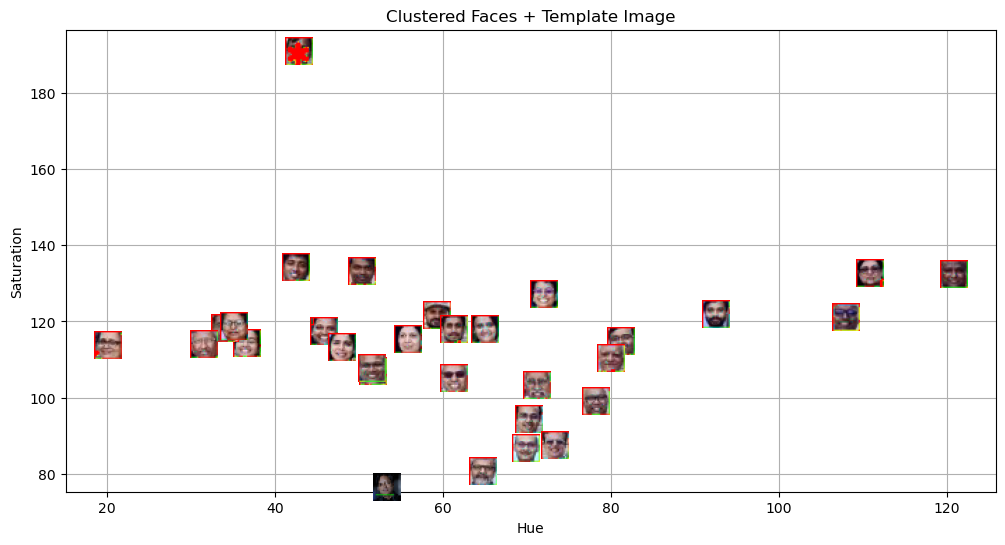

In [32]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img,cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
template_hue = []
template_saturation = []

for (x, y, w, h) in template_faces:
    face = template_hsv[y:y + h, x:x + w]
    template_hue.append(np.mean(face[:, :, 0]))
    template_saturation.append(np.mean(face[:, :, 1]))

template_hue = np.mean(template_hue)
template_saturation = np.mean(template_saturation)




# Predict the cluster label for the template image and store it in template_label
template_features=np.array([[template_hue,template_saturation]])
template_label = kmeans.predict(template_features)[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

## Put x label
plt.xlabel('Hue')
## Put y label
plt.ylabel('Saturation')
## Put title
plt.title('Clustered Faces + Template Image')
## Add grid
plt.grid()
## show plot
plt.show()

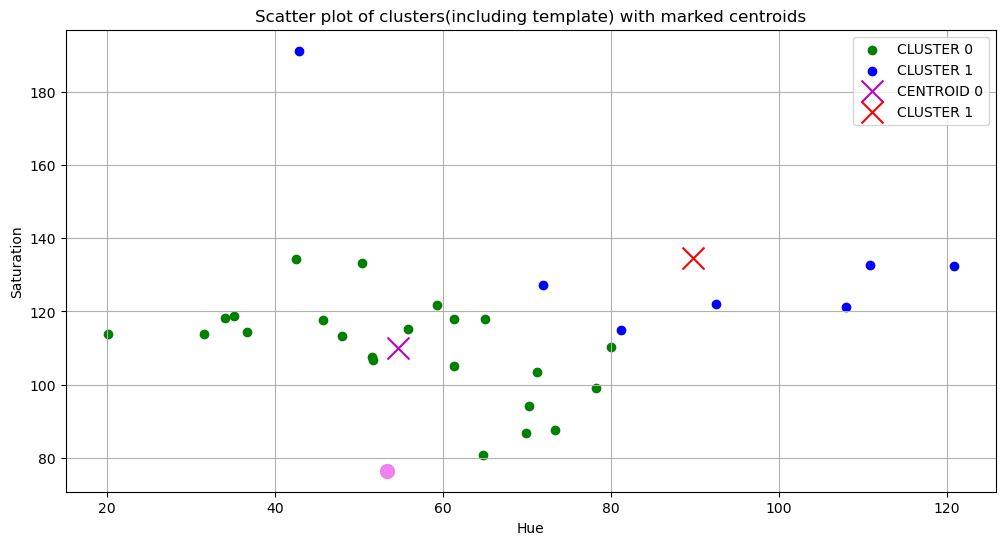

In [42]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:,0],cluster_0_points[:,1],color='g')
legend_labels.append('CLUSTER 0')

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:,0],cluster_1_points[:,1],color='b')
legend_labels.append('CLUSTER 1')

# Calculate and plot centroids for both the clusters
centroid_0 = centroids[0]
centroid_1 = centroids[1]
plt.scatter(centroid_0[0],centroid_0[1],marker='x',color='m',s=250) ## plot for centroid 0
legend_labels.append('CENTROID 0')
plt.scatter(centroid_1[0],centroid_1[1],marker='x',color='r',s=250)  ## plot for centroid 1
legend_labels.append('CLUSTER 1')
plt.plot(template_hue, template_saturation, marker='o', c= 'violet',markersize= 10, label=' Class ?' )

## Put x label
plt.xlabel('Hue')
## Put y label
plt.ylabel('Saturation')
## Put title
plt.title('Scatter plot of clusters(including template) with marked centroids')
## Add a legend
plt.legend(legend_labels)
## Add grid
plt.grid()
## show the plot
plt.show()
                                            ## End of the lab 5 ##

## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms? 
The most common distance metrics are:
- Euclidean distance
- Manhattan distance
- Cosine distance
- Mahalanobis distance
#### 2. What are some real-world applications of distance-based classification algorithms? 
Some real-world applications of distance-based classificiation algorithms are
- Image(e.g.Face) recognition
- Customer segmentation for marketing
- Medical Diagnosis

#### 3. Explain various distance metrics. 
- Euclidean distance: represents shortest distance between two vectors (does not account for distribution of data)
- Manhattan distance: measures the distance between two points along axes at right angles
- Mahalanobis distance: represents the distance between a point and a distribution (measures how many standard deviations away the point is from the mean of the distribution)
- Cosine distance: measures degree of angle between 2 vectors

#### 4. What is the role of cross validation in model performance? 
Cross validation helps evaluate model performance by
- helping to detect underfitting/overfitting
- allow for generalization
- reducing variances

#### 5. Explain variance and bias in terms of KNN? 
- Bias: error resulting from oversimplifying
- Variance: error resulting from sensitivity to fluctuations in training data
- k=1: low bias and high variance(overfitting-only works on training data)
- k=n: high bias and low variance(underfitting-ignores patterns prevalent in training data)
- bias and variance is a tradeoff that must be optimized